# S04 T01 visualització_exploratòria

## Dataframe de demora en aerolíneas de S03 T05

In [416]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# set the printing context
sns.set_context('paper', font_scale=1.6)

# Load the data resulting from S03 T05
delays = pd.read_csv('delays_min.csv', sep=',')
delays.describe()

,Unnamed: 0,FlightNum,AirTime,ArrDelay,DepDelay,Distance,Cancelled,VelMedia
count,1936758.00,1936758.00,1928371.00,1928371.00,1936758.00,1936758.00,1936758.00,1928371.00
mean,968378.50,2184.26,108.28,42.20,43.19,765.69,0.00,inf
std,559094.02,1944.70,68.64,56.78,53.40,574.48,0.02,NaN
min,0.00,1.00,0.00,-109.00,6.00,11.00,0.00,21.29
25%,484189.25,610.00,58.00,9.00,12.00,338.00,0.00,351.86
50%,968378.50,1543.00,90.00,24.00,24.00,606.00,0.00,403.82
75%,1452567.75,3422.00,137.00,56.00,53.00,998.00,0.00,448.15
max,1936757.00,9742.00,1091.00,2461.00,2467.00,4962.00,1.00,inf


## Exercici 1
Graficar las variables de demora en aerolíneas

### Variables categóricas

In [417]:
# define a function to plot a categorial variable
def plot_cat(vble):
    # take out the name of the column
    col_name = pd.DataFrame(vble).keys()[0]
    
    # calculate the values to display (counts)
    counts = vble.value_counts()
    # use a pie plot
    counts_bar = counts.plot(kind='pie', y=vble, figsize =(9, 9))
    
    # set titles
    counts_bar.set_title("Apariciones de {} en el Dataset".format(col_name), fontsize=16, weight="bold")
    counts_bar.set_xlabel("Cantidad de apariciones", fontsize=14, weight = "bold")
    counts_bar.set_ylabel("Valores de " + col_name,  fontsize=14, weight="bold")
    plt.show()
    
    # use a horizontal bar plot
    counts_bar = counts.plot(kind='barh', y=vble)
    plt.show()
    return



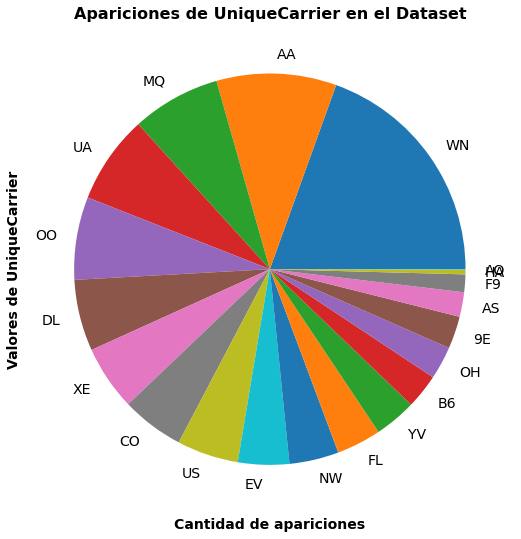

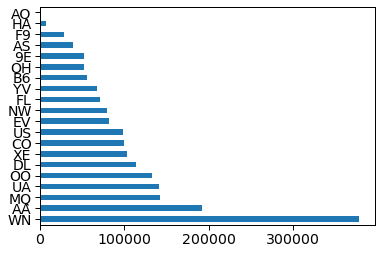

In [418]:
# call the function to plot UniqueCarrier
plot_cat(delays['UniqueCarrier'])

<AxesSubplot:xlabel='count', ylabel='UniqueCarrier'>

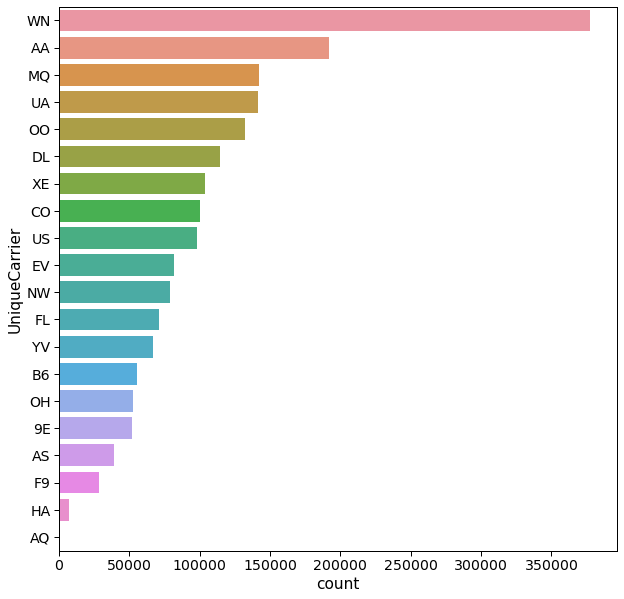

In [419]:
# the same can be done with sns
plt.figure(figsize=(10,10))
sns.countplot(y = 'UniqueCarrier', data = delays,  order = delays['UniqueCarrier'].value_counts().index)

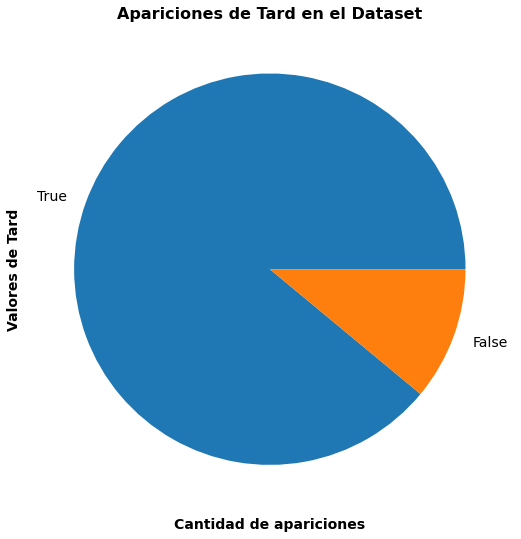

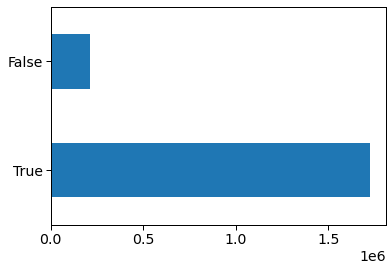

In [420]:
# call the function to plot Tard
plot_cat(delays['Tard'])

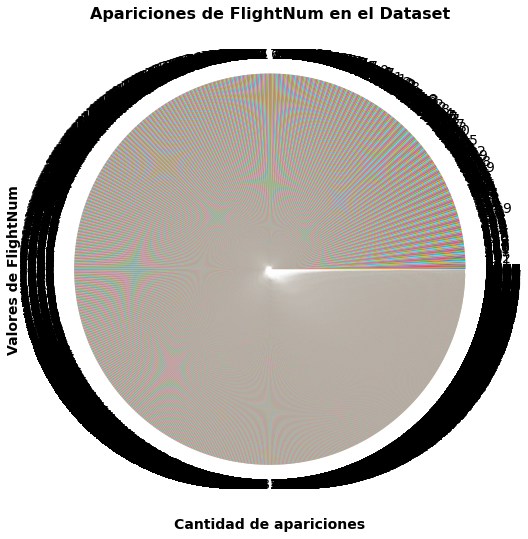

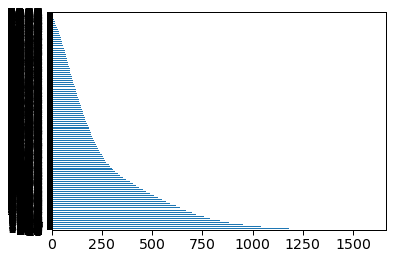

In [400]:
# FlightNum is categorical but has too many values 
# it takes a lot of time to run and returns a plot difficut to read
plot_cat(delays['FlightNum'])

### Variables numéricas

In [426]:
# format the floats into only 2 decimals
pd.options.display.float_format = '{:.2f}'.format

delays['ArrDelay'].describe()
# there are a few outliers that will complicate the plot

count   1928371.00
mean         42.20
std          56.78
min        -109.00
25%           9.00
50%          24.00
75%          56.00
max        2461.00
Name: ArrDelay, dtype: float64

In [462]:
# define a function to plot a numerical variable
def plot_num(vble):
    # take out the name of the column
    col_name = pd.DataFrame(vble).keys()[0]
    
    # elimino los outliers
    low = .02
    high = .98
    # obtengo los valores de los quantiles que quiero
    quant = vble.quantile([low, high])
    quant_vble = pd.DataFrame(vble).apply(lambda x: x[(x>quant.loc[low]) & (x < quant.loc[high])])
    
    # use a histogram
    quant_vble.plot(kind='hist', bins = 50, title = col_name)
    plt.show()
      
    sns.displot(quant_vble, bins= 50, label = col_name)
    
    plt.show()
    return

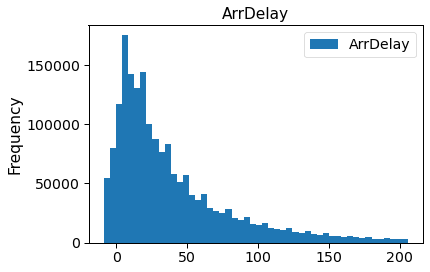

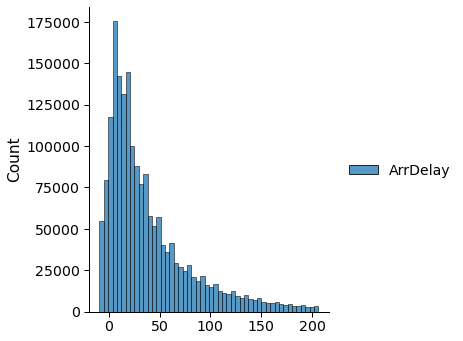

In [494]:
plot_num(delays['ArrDelay'])

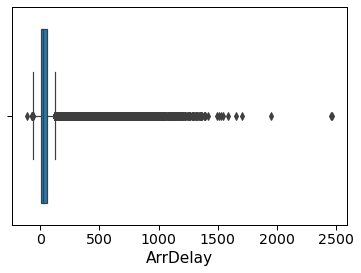

In [495]:
ax = sns.boxplot(x = delays['ArrDelay'])

In [496]:
# find out outliers to see a more clear graphic
print(delays['ArrDelay'].quantile([0.02, 0.99]))
print(delays['DepDelay'].quantile([0.02, 0.99]))

0.02   -10.00
0.99   256.00
Name: ArrDelay, dtype: float64
0.02     6.00
0.99   249.00
Name: DepDelay, dtype: float64


In [541]:
# there´s very little values over  300
# the plots are clearer if we eliminate these outliers
a = delays['ArrDelay'] < 300 
b = delays['DepDelay'] < 300

#this is a new datagframe with little less data
arr_delay = delays.loc[a | b]

arr_delay.describe()

,Unnamed: 0,FlightNum,AirTime,ArrDelay,DepDelay,Distance,Cancelled,VelMedia
count,1927570.00,1927570.00,1919308.00,1919308.00,1927570.00,1927570.00,1927570.00,1919308.00
mean,968103.87,2184.00,108.24,40.38,41.37,765.41,0.00,inf
std,559071.79,1944.17,68.61,48.97,45.09,574.09,0.02,NaN
min,0.00,1.00,0.00,-109.00,6.00,11.00,0.00,21.29
25%,483910.25,611.00,58.00,9.00,12.00,338.00,0.00,351.92
50%,967848.50,1543.00,90.00,24.00,24.00,606.00,0.00,403.82
75%,1452539.75,3422.00,137.00,55.00,53.00,998.00,0.00,448.12
max,1936757.00,9742.00,1091.00,1050.00,351.00,4962.00,1.00,inf


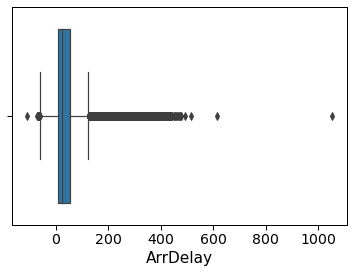

In [542]:
ax = sns.boxplot(x = arr_delay['ArrDelay'])

### Una variable numérica y una categórica

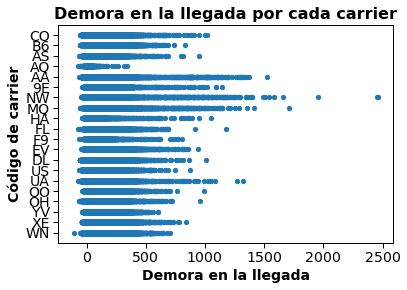

In [543]:
# Plot one numerical variable with one categorica: scatter plot
# ArrDelay and UniqueCarrier
dos = delays.plot(kind = 'scatter', x='ArrDelay', y='UniqueCarrier')
dos.set_title('Demora en la llegada por cada carrier', fontsize=16, weight="bold")
dos.set_xlabel("Demora en la llegada", fontsize=14, weight = "bold")
dos.set_ylabel('Código de carrier',  fontsize=14, weight="bold")
plt.show()

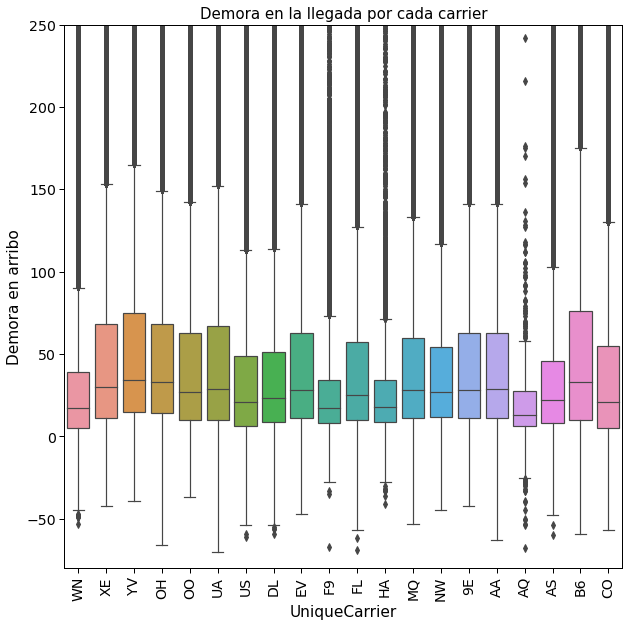

In [525]:
# Plot one numerical variable with one categorica: boxplot
# ArrDelay and UniqueCarrier
plt.figure(figsize =(10, 10))
sns.boxplot(x=delays['UniqueCarrier'], y=delays["ArrDelay"])
plt.title('Demora en la llegada por cada carrier', fontsize=15)
plt.xlabel("UniqueCarrier")
plt.ylabel("Demora en arribo")
plt.xticks(rotation='vertical')
# trabajo con todos los datos peor limito lo que muestro para no complicar con outliers
plt.ylim(-80,250)
plt.show()

### Dos variables numéricas relacionadas

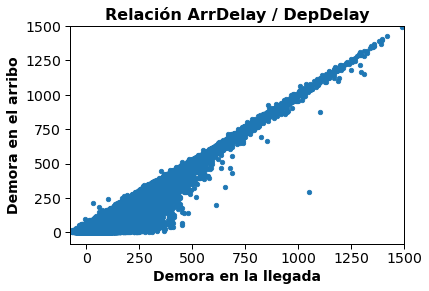

In [535]:
# Plot two numerical variables together (complete data)
dos = delays.plot(kind = 'scatter', x='ArrDelay', y='DepDelay')
dos.set_title('Relación ArrDelay / DepDelay', fontsize=16, weight="bold")
dos.set_xlabel("Demora en la llegada", fontsize=14, weight = "bold")
dos.set_ylabel('Demora en el arribo',  fontsize=14, weight="bold")
plt.xlim(-80,1500)
plt.ylim(-80,1500)
plt.show()

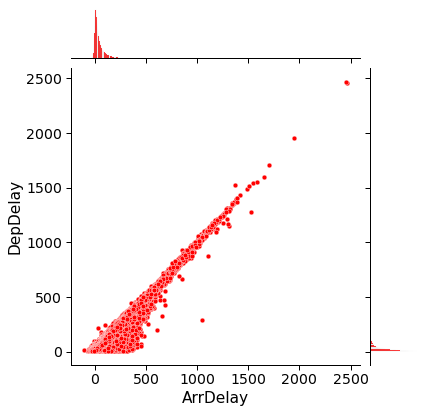

In [539]:
# Plot two numerical variables together
sns.jointplot(x=delays['ArrDelay'], y= delays['DepDelay'], color='r')


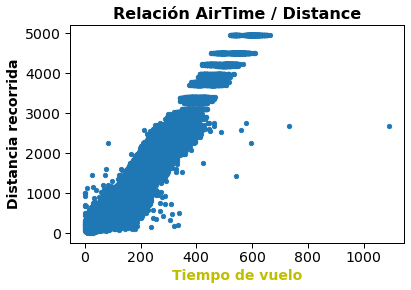

In [546]:
# Plot two numerical variables together: AirTime and Distance
dos = delays.plot(kind = 'scatter', x='AirTime', y='Distance')
dos.set_title('Relación AirTime / Distance', fontsize=16, weight="bold")
dos.set_xlabel("Tiempo de vuelo", fontsize=14, weight = "bold", color='y')
dos.set_ylabel('Distancia recorrida',  fontsize=14, weight="bold")
plt.show()

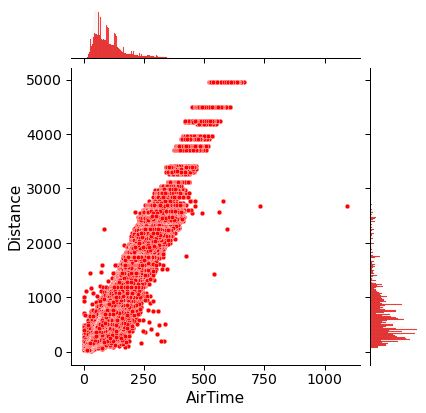

In [547]:
sns.jointplot(x=delays['AirTime'], y= delays['Distance'], color='r')

### Plot de dos variables en subplots

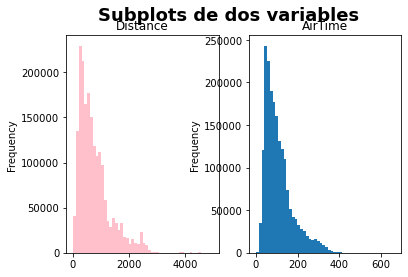

In [240]:
# create a figure with two subplots, one for each variable
fig = plt.figure()
#first subplot
plt.subplot(1, 2, 1)
arr_delay['Distance'].plot(kind='hist', bins = 50, title = 'Distance', color ='pink')
# second subplot
plt.subplot(1, 2, 2)
arr_delay['AirTime'].plot(kind='hist', bins = 50, title = 'AirTime')
fig.suptitle('Subplots de dos variables', fontsize=18, weight = 'bold')
plt.show()

### Plot con tres variables

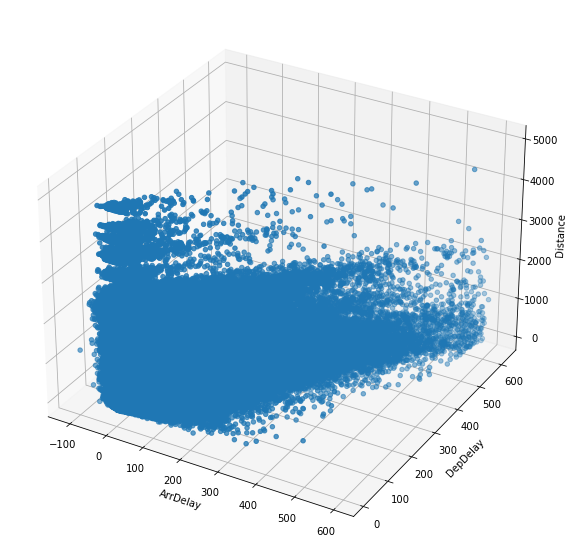

In [250]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(arr_delay['ArrDelay'], arr_delay['DepDelay'], arr_delay['Distance'])
ax.set_xlabel('ArrDelay')
ax.set_ylabel('DepDelay')
ax.set_zlabel('Distance')
plt.show()

### Gráfico con tres subplots

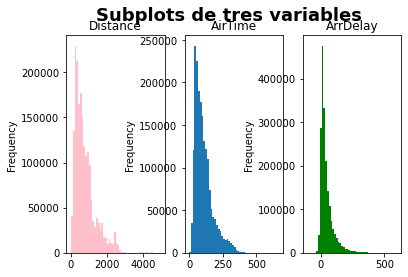

In [306]:
# create a figure with three subplots, one for each variable
fig = plt.figure()
#first subplot
plt.subplot(1, 3, 1)
arr_delay['Distance'].plot(kind='hist', bins = 50, title = 'Distance', color ='pink')
# second subplot
plt.subplot(1, 3, 2)
arr_delay['AirTime'].plot(kind='hist', bins = 50, title = 'AirTime')
# third subplot
plt.subplot(1, 3, 3)
arr_delay['ArrDelay'].plot(kind='hist', bins = 50, title = 'ArrDelay', color='g')
fig.suptitle('Subplots de tres variables', fontsize=18, weight = 'bold')
plt.show()

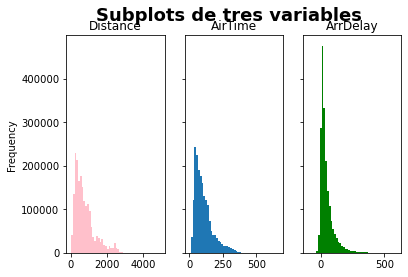

In [307]:
# I want the three plots to share the y axis
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
#fig = plt.figure()
#first subplot
ax1 = plt.subplot(1, 3, 1)
arr_delay['Distance'].plot(kind='hist', bins = 50, title = 'Distance', color ='pink')
# second subplot
ax2 = plt.subplot(1, 3, 2, sharey = ax1)
arr_delay['AirTime'].plot(kind='hist', bins = 50, title = 'AirTime')
# third subplot
ax3 = plt.subplot(1, 3, 3, sharey = ax1)
arr_delay['ArrDelay'].plot(kind='hist', bins = 50, title = 'ArrDelay', color='g')
fig.suptitle('Subplots de tres variables', fontsize=18, weight = 'bold')
plt.show()

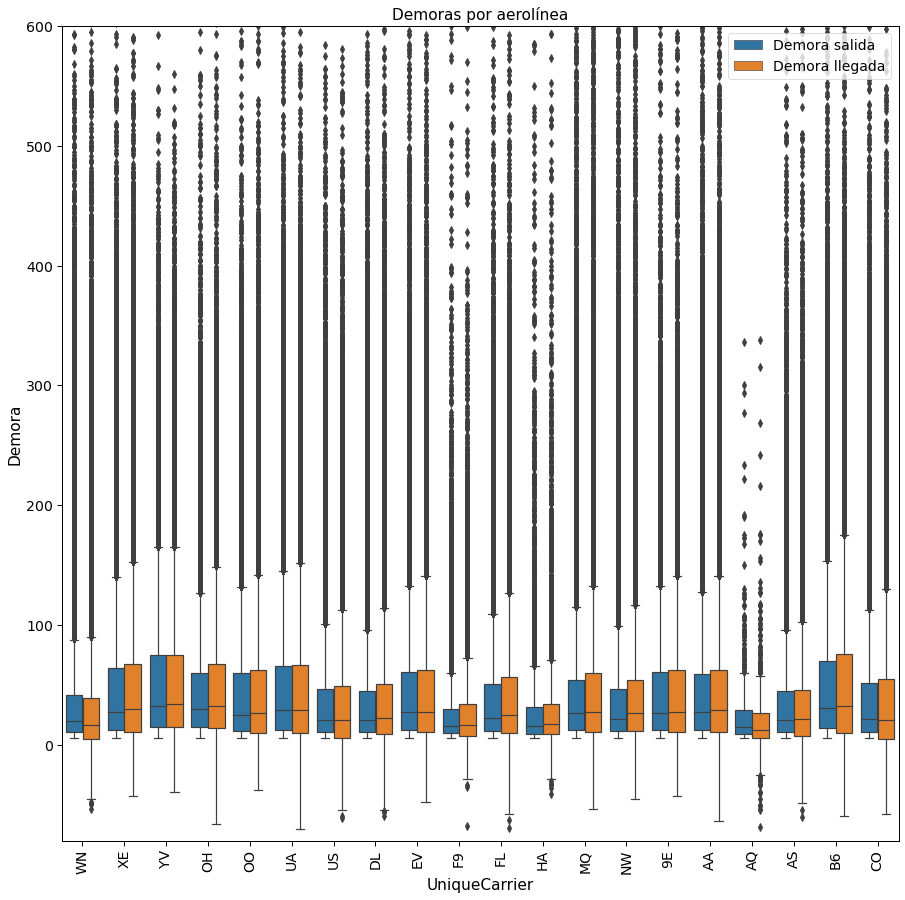

In [548]:
# Plot two numerical variables with one categorica: boxplot
# ArrDelay. DepDelay and UniqueCarrier
dd = delays[['UniqueCarrier', 'DepDelay']].copy()
dd.rename(columns={'DepDelay': 'DelayMinutes'}, inplace = True)
dd['DelayType'] = "Demora salida"
ad = delays[['UniqueCarrier', 'ArrDelay']].copy()
ad.rename(columns={'ArrDelay': 'DelayMinutes'}, inplace = True)
ad['DelayType'] ='Demora llegada'
# Concat ArrDelay with DepDelay to have them in one column
data = pd.concat([dd, ad])
del dd, ad



plt.figure(figsize =(15, 15))
sns.boxplot(x=data["UniqueCarrier"], y=data["DelayMinutes"], hue=data["DelayType"], )
plt.title('Demoras por aerolínea')
plt.xlabel("UniqueCarrier")
plt.ylabel("Demora")
plt.xticks(rotation='vertical')
plt.legend(loc='upper right')
# don´t consider outliers to see more data
plt.ylim(-80,600)

plt.show()

### Gráficos con más de 3 variables

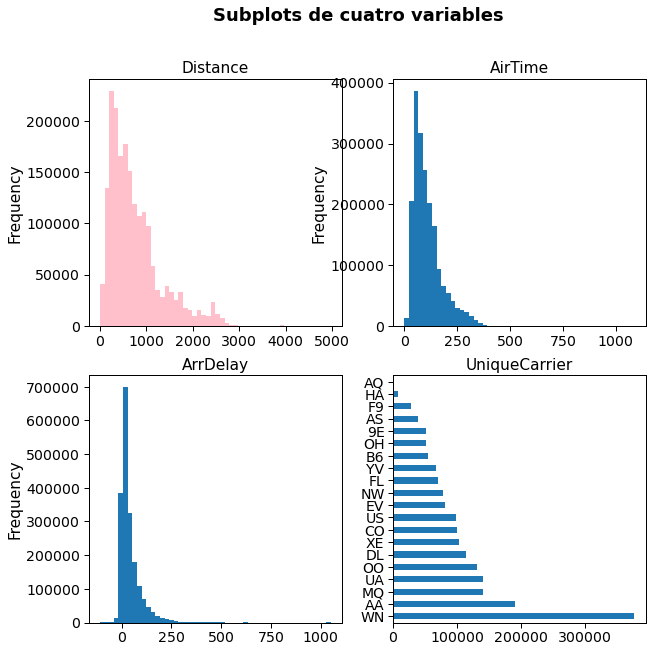

In [549]:
# create a figure with four subplots, one for each variable, one of them categorical
fig = plt.figure(figsize =(10, 10))
#first subplot
plt.subplot(2, 2, 1)
arr_delay['Distance'].plot(kind='hist', bins = 50, title = 'Distance', color ='pink')
# second subplot
plt.subplot(2, 2, 2)
arr_delay['AirTime'].plot(kind='hist', bins = 50,  title = 'AirTime')
# third subplot
plt.subplot(2, 2, 3)
arr_delay['ArrDelay'].plot(kind='hist', bins = 50,  title = 'ArrDelay')
# forth subplot
plt.subplot(2, 2, 4)
arr_delay['UniqueCarrier'].value_counts().plot(kind='barh', title = 'UniqueCarrier')
fig.suptitle('Subplots de cuatro variables', fontsize=18, weight = 'bold')
plt.show()

In [550]:
# find out the median per UniqueCarrier
medianas = pd.DataFrame(delays.groupby('UniqueCarrier').agg({'ArrDelay':[np.median], 'DepDelay':[np.median], 'AirTime':[np.median]}))


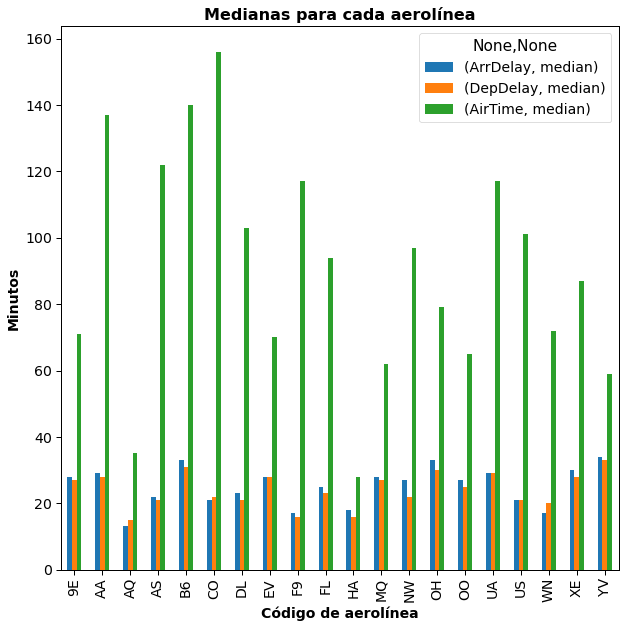

In [554]:
#plot the median values of ArrDelay, DepDelay and AirTime for each airline
fig = medianas.plot(kind='bar', figsize= (10,10))
fig.set_title('Medianas para cada aerolínea', fontsize=16, weight="bold")
fig.set_xlabel("Código de aerolínea", fontsize=14, weight = "bold")
fig.set_ylabel('Minutos',  fontsize=14, weight="bold")
# guardo la imagen como jpg
plt.savefig('Medianas.jpg', format='jpg',bbox_inches= 'tight', pad_inches=0.1)
plt.show()

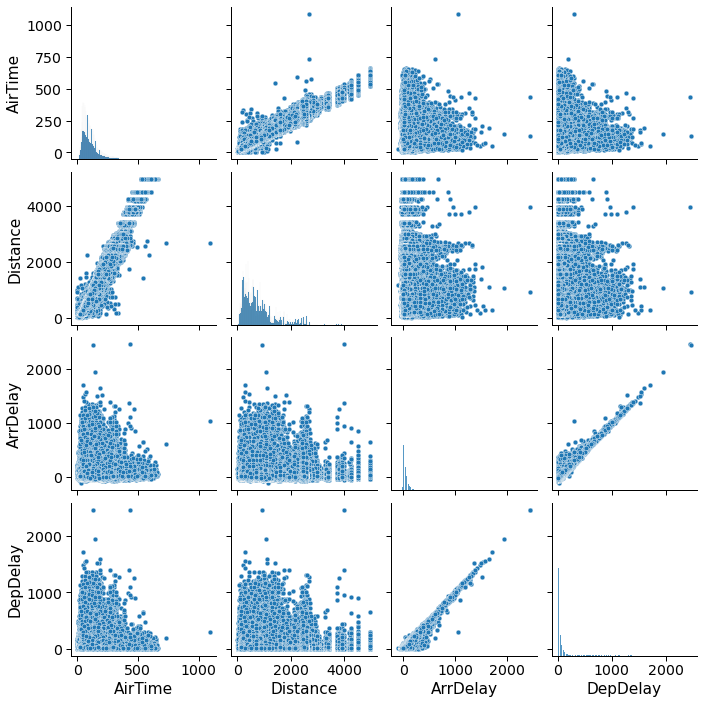

In [560]:
# compare a number of variables with each other, two each time
sns.pairplot(delays[['AirTime','Distance','ArrDelay','DepDelay']])

## Exercici 2
Guardar las imágenes como archivo de imagen

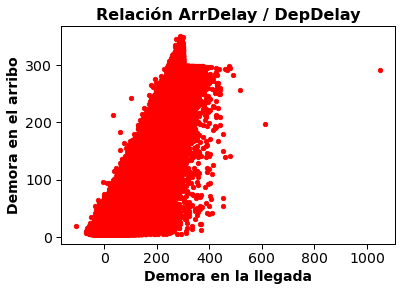

In [552]:
# Given any of the images above, for example:
dos = arr_delay.plot(kind = 'scatter', x='ArrDelay', y='DepDelay', color='r')
dos.set_title('Relación ArrDelay / DepDelay', fontsize=16, weight="bold")
dos.set_xlabel("Demora en la llegada", fontsize=14, weight = "bold")
dos.set_ylabel('Demora en el arribo',  fontsize=14, weight="bold")
# Save the image as jpg
plt.savefig('DemoraArriboDemoraSalida.jpg', format='jpg',bbox_inches= 'tight', pad_inches=0.1)

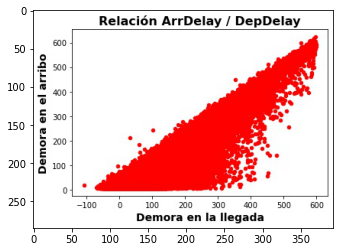

In [384]:
# Para volver a leer la imagen en el notebook:
from skimage import io
image=io.imread("DemoraArriboDemoraSalida.jpg")
plt.imshow(image)